In [1]:
# %reset
import numpy as np
import sys,os
import readgadget
import MAS_library as MASL
import pickle as pk
import readfof
import matplotlib

import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline



%load_ext Cython

# # This routine computes the density field and save results to file
# def compute_df(snapshot, ptypes, grid, fout):
#     # if not(os.path.exists(snapshot+'.0')) and not(os.path.exists(snapshot+'.0.hdf5')):
#         # return 0
#     print(snapshot)
#     df = MASL.density_field_gadget(snapshot, ptypes, grid, MAS='CIC',
#                                    do_RSD=False, axis=0, verbose=True)
#     df = df/np.mean(df, dtype=np.float64)-1.0
#     np.save(fout, df)
    

    
    



In [3]:
%load_ext Cython



The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [4]:
%%cython

cimport numpy as np
cpdef void NGP_mass(np.float32_t[:,:] pos, np.float32_t[:] logM, np.float32_t[:,:,:,:] gridM, float BoxSize):

    cdef int axis,dims,coord,nMmax,jM
    cdef long i,particles
    cdef float inv_cell_size
    cdef int index[3]

    # find number of particles, the inverse of the cell size and dims
    particles = pos.shape[0];  coord = pos.shape[1];  dims = gridM.shape[0]; nMmax = gridM.shape[3]
    inv_cell_size = dims/BoxSize

    # when computing things in 2D, use the index[2]=0 plane
    for i in range(3):  index[i] = 0

    # do a loop over all particles
    for i in range(particles):
        for axis in range(coord):
            index[axis] = <int>(pos[i,axis]*inv_cell_size + 0.5)
            index[axis] = (index[axis]+dims)%dims
        for jM in range(nMmax):
            if gridM[index[0],index[1],index[2], jM] == 0:
                gridM[index[0],index[1],index[2], jM] = logM[i]
                break
            else:
                pass
        
        
        
        

In file included from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /dev/shm/.cache-spandey/ipython/cython/_cython_magic_8904f5d759893c5f210bc6eabb3ad62b.c:775:
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


In [5]:
%%cython
cimport numpy as np
cpdef void NGP_xyz(np.float32_t[:,:] pos, np.float32_t[:,:,:,:,:] gridM, float BoxSize):

    cdef int axis,dims,coord,nMmax,jM
    cdef long i,particles
    cdef float inv_cell_size
    cdef float pos0, pos1, pos2
    cdef int index[3]
    cdef int tobreak

    # find number of particles, the inverse of the cell size and dims
    particles = pos.shape[0];  coord = pos.shape[1];  dims = gridM.shape[0]; nMmax = gridM.shape[3]
    inv_cell_size = dims/BoxSize

    # when computing things in 2D, use the index[2]=0 plane
    for i in range(3):  index[i] = 0

    # do a loop over all particles
    for i in range(particles):
        for axis in range(coord):
            index[axis] = <int>(pos[i,axis]*inv_cell_size + 0.5)
            if axis == 0:
                pos0 = pos[i,axis] - index[axis]*BoxSize/dims
            if axis == 1:
                pos1 = pos[i,axis] - index[axis]*BoxSize/dims
            if axis == 2:
                pos2 = pos[i,axis] - index[axis]*BoxSize/dims
            index[axis] = (index[axis]+dims)%dims
        for jM in range(nMmax):
            if (gridM[index[0],index[1],index[2], jM, 0] == 0) and (gridM[index[0],index[1],index[2], jM, 1] == 0) and (gridM[index[0],index[1],index[2], jM, 2] == 0):
                gridM[index[0],index[1],index[2], jM, 0] = pos0
                gridM[index[0],index[1],index[2], jM, 1] = pos1
                gridM[index[0],index[1],index[2], jM, 2] = pos2
                # gridM[index[0],index[1],index[2], jM, 3] = logM[i]
                break
            else:
                pass


            

In file included from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /dev/shm/.cache-spandey/ipython/cython/_cython_magic_3007918a1378e9a4e92258b6f470101a.c:776:
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/dev/shm/.cache-spandey/ipython/cython/_cython_magic_3007918a1378e9a4e92258b6f470101a.c: In function '__pyx_pw_46_cython_magic_3007918a137

In [6]:

%%cython
cimport numpy as np
cpdef void NGP_xyzM(np.float32_t[:,:] pos, np.float32_t[:] logM, np.float32_t[:,:,:,:,:] gridM, float BoxSize):

    cdef int axis,dims,coord,nMmax,jM
    cdef long i,particles
    cdef float inv_cell_size
    cdef float pos0, pos1, pos2
    cdef int index[3]
    cdef int tobreak

    # find number of particles, the inverse of the cell size and dims
    particles = pos.shape[0];  coord = pos.shape[1];  dims = gridM.shape[0]; nMmax = gridM.shape[3]
    inv_cell_size = dims/BoxSize

    # when computing things in 2D, use the index[2]=0 plane
    for i in range(3):  index[i] = 0

    # do a loop over all particles
    for i in range(particles):
        for axis in range(coord):
            index[axis] = <int>(pos[i,axis]*inv_cell_size + 0.5)
            if axis == 0:
                pos0 = pos[i,axis] - index[axis]*BoxSize/dims
            if axis == 1:
                pos1 = pos[i,axis] - index[axis]*BoxSize/dims
            if axis == 2:
                pos2 = pos[i,axis] - index[axis]*BoxSize/dims
            index[axis] = (index[axis]+dims)%dims
        for jM in range(nMmax):
            if (gridM[index[0],index[1],index[2], jM, 0] == 0) and (gridM[index[0],index[1],index[2], jM, 1] == 0) and (gridM[index[0],index[1],index[2], jM, 2] == 0) and (gridM[index[0],index[1],index[2], jM, 3] == 0):
                gridM[index[0],index[1],index[2], jM, 0] = pos0
                gridM[index[0],index[1],index[2], jM, 1] = pos1
                gridM[index[0],index[1],index[2], jM, 2] = pos2
                gridM[index[0],index[1],index[2], jM, 3] = logM[i]
                break
            else:
                pass


            
            
            

In file included from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /dev/shm/.cache-spandey/ipython/cython/_cython_magic_ee7ed4c6b8443d8511f8428edf243dd6.c:777:
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/dev/shm/.cache-spandey/ipython/cython/_cython_magic_ee7ed4c6b8443d8511f8428edf243dd6.c: In function '__pyx_pw_46_cython_magic_ee7ed4c6b84

In [7]:
from tqdm import tqdm
isim_fid_array = np.arange(4, 11)

for isim_fid in tqdm(isim_fid_array):

    # isim_fid = 3


    snapnum = 3
    mass_type = 'rockstar_200c'
    snap_dir_base = '/mnt/home/fvillaescusa/ceph/Quijote/Halos/Rockstar/fiducial_HR'
    snapdir = snap_dir_base + '/' + str(isim_fid)  #folder hosting the catalogue
    rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
    with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
        lines = f.readlines()
    header = lines[0].split()
    # get the properties of the halos
    pos_h_truth = rockstar[:,header.index('X'):header.index('Z')+1]
    if mass_type == 'rockstar_vir':
        index_M = header.index('Mvir')                    
        mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h
    if mass_type == 'rockstar_200c':
        index_M = header.index('M200c')                    
        mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h

    # Mmin_cut = 1e13
    Mmin_cut = 10**13.5
    lgMass_truth = np.log10(mass_truth)
    indsel = np.where(mass_truth > Mmin_cut)[0]
    # print(grid, len(indsel), len(mass_truth), np.amin(lgMass_truth), np.log10(Mmin_cut))
    pos_h_truth = pos_h_truth[indsel]
    lgMass_truth = lgMass_truth[indsel]


    # pos_h_truth.shape, mass_truth.shape
    np.random.seed(0)
    import numpy as np
    import h5py as h5
    root = '/mnt/home/spandey/ceph/fastpm/fiducial_HR/hdf5_files/'
    z = {4:0, -1: 99, 3:0.5}[snapnum]
    df = h5.File(root + str(isim_fid) + '/SNAPSHOT_fastpm_B3_z' + str(z) + '.hdf5', 'r')            
    pos = df['Position'][:]
    vel = df['Velocity'][:]
    ids = np.arange(len(pos))
    # get random permutation of indices of particles:
    arg_rand_perm = np.random.permutation(len(pos))

    # npart_test = 256**3
    # npart_test = 512**3
    npart_test = 384**3
    # downsample = int(len(pos)/npart_test)
    # select a random subset of particles:

    ind = arg_rand_perm[:npart_test]
    pos_m_truth = pos[ind]
    vel_m_truth = vel[ind]
    ids_m_truth = ids[ind]



    BoxSize = 1000.
    grid = 32
    nMax_m = 32
    Npart = np.float32(np.zeros((grid, grid, grid)))
    MASL.NGP(np.float32(pos_m_truth), Npart, BoxSize)


    # elif grid == 128:
    BoxSize = 1000.
    grid = 32
    nMax_h = 6000
    dfpart_ngp_wxyz = np.float32(np.zeros((grid, grid, grid, nMax_h, 3)))
    NGP_xyz(np.float32(pos_m_truth), dfpart_ngp_wxyz, BoxSize)


    from tqdm import tqdm
    norm_delta = 1000            
    grid_sbox = 32
    MAS = 'NGP'
    verbose = False
    delta_box_all = np.zeros((grid, grid, grid, grid_sbox, grid_sbox, grid_sbox, 3))
    for j1 in tqdm(range(grid)):
        for j2 in range(grid):
            for j3 in range(grid):
                
                if j1 == 0:
                    jn1 = grid - 1
                else:
                    jn1 = j1 - 1
                if j1 == grid - 1:
                    jp1 = 0
                else:
                    jp1 = j1 + 1

                jp1_all = [jn1, j1, jp1]

                if j2 == 0:
                    jn2 = grid - 1
                else:
                    jn2 = j2 - 1

                if j2 == grid - 1:
                    jp2 = 0
                else:
                    jp2 = j2 + 1

                jp2_all = [jn2, j2, jp2]

                if j3 == 0:
                    jn3 = grid - 1
                else:
                    jn3 = j3 - 1

                if j3 == grid - 1:
                    jp3 = 0
                else:
                    jp3 = j3 + 1

                jp3_all = [jn3, j3, jp3]

                coord_add_sign = [-1,0,1]
                all_part = []
                for i1 in range(3):
                    for i2 in range(3):
                        for i3 in range(3):
                            all_part_here = dfpart_ngp_wxyz[jp1_all[i1],jp2_all[i2],jp3_all[i3]]
                            indpos = np.where(all_part_here[:,0] != 0)[0]
                            all_part_here = all_part_here[indpos,:]
                            all_part_here[:,0] = all_part_here[:,0] + coord_add_sign[i1]*BoxSize/(grid)
                            all_part_here[:,1] = all_part_here[:,1] + coord_add_sign[i2]*BoxSize/(grid)
                            all_part_here[:,2] = all_part_here[:,2] + coord_add_sign[i3]*BoxSize/(grid)

                            if len(all_part) == 0:
                                all_part = all_part_here
                            else:
                                all_part = np.vstack((all_part, all_part_here))



                box_size_sbox = BoxSize/(2*grid)
                all_part0_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
                all_part0 = all_part[all_part0_sel]
                delta_sbox0 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
                MASL.MA(all_part0 + box_size_sbox, delta_sbox0, (2*box_size_sbox), MAS, verbose=verbose)
                nbar0 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
                delta_sbox0 /= nbar0
                delta_sbox0 /= norm_delta


                box_size_sbox = 2*BoxSize/(2*grid)
                all_part1_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
                all_part1 = all_part[all_part1_sel]
                delta_sbox1 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
                MASL.MA(all_part1 + box_size_sbox, delta_sbox1, (2*box_size_sbox), MAS, verbose=verbose)
                nbar1 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
                delta_sbox1 /= nbar1
                delta_sbox1 /= norm_delta


                box_size_sbox = 3*BoxSize/(2*grid)
                all_part2 = all_part
                delta_sbox2 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
                MASL.MA(all_part2 + box_size_sbox, delta_sbox2, (2*box_size_sbox), MAS, verbose=verbose)
                nbar2 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
                delta_sbox2 /= nbar2
                delta_sbox2 /= norm_delta

                delta_sbox_all = np.stack((delta_sbox0, delta_sbox1, delta_sbox2))

                # move first axis to last:
                delta_sbox_all = np.moveaxis(delta_sbox_all, 0, -1)

                delta_box_all[j1,j2,j3] = delta_sbox_all


    delta_box_all_squeezed = np.reshape(delta_box_all, (grid*grid*grid, grid_sbox, grid_sbox, grid_sbox, 3))

    # elif grid == 128:
    BoxSize = 1000.
    grid = 32
    # nMax_h = 42
    nMax_h = 20
    dfhalo_ngp_wxyzM = np.float32(np.zeros((grid, grid, grid, nMax_h, 4)))
    NGP_xyzM(np.float32(pos_h_truth), np.float32(lgMass_truth), dfhalo_ngp_wxyzM, BoxSize)


    # dfhalo_ngp_wxyzM_squeezed = np.reshape(dfhalo_ngp_wxyzM, (grid*grid*grid, nMax_h, 4))
    Nhalos_truth = np.float32(np.zeros((grid, grid, grid)))
    MASL.NGP(np.float32(pos_h_truth), Nhalos_truth, BoxSize)

    M_halos_argsort = np.flip(np.argsort(dfhalo_ngp_wxyzM[:,:,:,:,3], axis=-1), axis=-1)
    xmin = BoxSize/grid/2
    lgMin = np.log10(Mmin_cut)
    lgMax = 15.5
    dfhalo_ngp_xyzM_sorted_scaled = np.zeros_like(dfhalo_ngp_wxyzM)
    for i1 in range(grid):
        for i2 in range(grid):
            for i3 in range(grid):
                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 0] = dfhalo_ngp_wxyzM[i1, i2, i3, M_halos_argsort[i1, i2, i3], 0]
                indpos_x = np.where(dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 0] != 0.0)[0]
                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_x, 0] = (dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_x, 0] + xmin)/(2*xmin)

                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 1] = dfhalo_ngp_wxyzM[i1, i2, i3, M_halos_argsort[i1, i2, i3], 1]
                indpos_y = np.where(dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 1] != 0.0)[0]
                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_y, 1] = (dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_y, 1] + xmin)/(2*xmin)

                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 2] = dfhalo_ngp_wxyzM[i1, i2, i3, M_halos_argsort[i1, i2, i3], 2]
                indpos_z = np.where(dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 2] != 0.0)[0]
                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_z, 2] = (dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_z, 2] + xmin)/(2*xmin)

                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 3] = dfhalo_ngp_wxyzM[i1, i2, i3, M_halos_argsort[i1, i2, i3], 3]
                indpos_M = np.where(dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, :, 3] != 0.0)[0]
                dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_M, 3] = (dfhalo_ngp_xyzM_sorted_scaled[i1, i2, i3, indpos_M, 3] - lgMin)/(lgMax - lgMin)



    indzeros = np.where(dfhalo_ngp_xyzM_sorted_scaled == 0.0)
    dfhalo_ngp_xyzM_sorted_scaled[indzeros] = -1.0


    # np.amin(dfhalo_ngp_xyzM_sorted_scaled), np.amax(dfhalo_ngp_xyzM_sorted_scaled)
    # nvocab = 128
    nvocab = 64
    bins_digitize = np.linspace(-1e-3, 1, nvocab)
    # bins_digitize.insert(0, -1)
    bins_digitize = np.insert(bins_digitize, 0, -1)
    # bins_digitize
    dfhalo_ngp_xyzM_sorted_scaled_digitized = np.digitize(dfhalo_ngp_xyzM_sorted_scaled, bins_digitize)

    start_token = 0
    pad_token = 1
    end_token = nvocab + 1
    space_token = nvocab + 2
    max_sentence_length = 1 + nMax_h*4 + 1 + (nMax_h-1)
    dfhalo_ngp_xyzM_tokenized = np.zeros((grid, grid, grid, max_sentence_length), dtype=np.int32) + end_token

    dfhalo_ngp_xyzM_tokenized[..., 0] = start_token
    # for jh in range(nMax_h):
    jh = 1
    while jh < 5*nMax_h:
        # if dfhalo_ngp_xyzM_sorted_scaled_digitized[..., jh, 0] > 1:
        dfhalo_ngp_xyzM_tokenized[..., jh + 0] = dfhalo_ngp_xyzM_sorted_scaled_digitized[..., jh//5, 3]
        dfhalo_ngp_xyzM_tokenized[..., jh + 1] = dfhalo_ngp_xyzM_sorted_scaled_digitized[..., jh//5, 0]
        dfhalo_ngp_xyzM_tokenized[..., jh + 2] = dfhalo_ngp_xyzM_sorted_scaled_digitized[..., jh//5, 1]
        dfhalo_ngp_xyzM_tokenized[..., jh + 3] = dfhalo_ngp_xyzM_sorted_scaled_digitized[..., jh//5, 2]
        if jh//5 < nMax_h - 1:
            dfhalo_ngp_xyzM_tokenized[..., jh + 4] = space_token
        # else:
        #     dfhalo_ngp_xyzM_tokenized[..., 1 + nMax_h*4] = end_token
        jh += 5



    dfhalo_ngp_xyzM_tokenized_padded_ended = np.copy(dfhalo_ngp_xyzM_tokenized)
    for i1 in range(grid):
        for i2 in range(grid):
            for i3 in range(grid):
                ind1 = np.where(dfhalo_ngp_xyzM_tokenized[i1, i2, i3,:] == 1)[0]
                try:
                    ind1 = ind1[0]
                    if ind1 == 1:
                        dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1] = end_token
                        dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1+1:] = pad_token
                    else:
                        dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1-1] = end_token
                        dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1:] = pad_token
                except:
                    dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1-1] = end_token
                    # dfhalo_ngp_xyzM_tokenized_padded_ended[i1, i2, i3, ind1:] = pad_token



    dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed = np.reshape(dfhalo_ngp_xyzM_tokenized_padded_ended, (grid*grid*grid, max_sentence_length))
    # dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed.shape

    dfhalo_ngp_wxyzM_flatten = np.reshape(dfhalo_ngp_wxyzM, (grid*grid*grid, nMax_h, 4))
    Nhalos_truth_flatten = np.reshape(Nhalos_truth, (grid*grid*grid,))


    saved = {'dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed':dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed.astype(np.int16),
            'dfhalo_ngp_wxyzM': dfhalo_ngp_wxyzM.astype(np.float32),
            'Nhalos_truth': Nhalos_truth.astype(np.int16),
            'delta_box_all_squeezed': delta_box_all_squeezed.astype(np.float32),
            'nvocab_total': nvocab + 3,
            'max_sentence_length': max_sentence_length,
            'grid': grid,
            'nMax_h': nMax_h,
            'BoxSize': BoxSize,
            'lgMin': lgMin,
            'lgMax': lgMax,
            'xmin': xmin,
            'norm_delta': norm_delta,
            'start_token': start_token,
            'pad_token': pad_token,
            'end_token': end_token,
            'space_token': space_token
            }

    pk.dump(saved, open(f'/mnt/home/spandey/ceph/GOTHAM/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_{grid_sbox}_isim_{isim_fid}_snap_{snapnum}_nvocab64_Mmin_1e13p5.pkl', 'wb'))




  0%|          | 0/7 [00:00<?, ?it/s]/tmp/ipykernel_708858/376936451.py:28: RuntimeWarning: divide by zero encountered in log10
  lgMass_truth = np.log10(mass_truth)
100%|██████████| 7/7 [31:42<00:00, 271.86s/it]


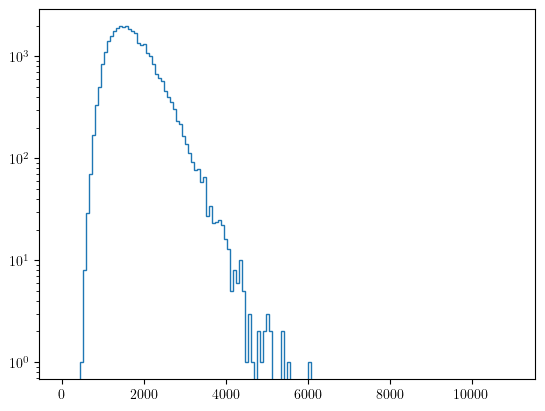

In [401]:
# pl.figure()
# _ = pl.hist(Npart.flatten(), bins=150, range=(0, 11000), histtype='step')
# # _ = pl.hist(Npart_IC.flatten(), bins=150, range=(0, 11000), histtype='step')
# pl.yscale('log')






In [403]:
# BoxSize = 1000.
# grid = 32
# nMax_h_IC = 2100
# dfpart_ngp_wxyz_IC = np.float32(np.zeros((grid, grid, grid, nMax_h_IC, 3)))
# NGP_xyz(np.float32(pos_m_truth_IC), dfpart_ngp_wxyz_IC, BoxSize)




In [404]:
# norm_delta = 1000
# if j1 == 0:
#     jn1 = grid - 1
# else:
#     jn1 = j1 - 1
# if j1 == grid - 1:
#     jp1 = 0
# else:
#     jp1 = j1 + 1

# jp1_all = [jn1, j1, jp1]

# if j2 == 0:
#     jn2 = grid - 1
# else:
#     jn2 = j2 - 1

# if j2 == grid - 1:
#     jp2 = 0
# else:
#     jp2 = j2 + 1

# jp2_all = [jn2, j2, jp2]

# if j3 == 0:
#     jn3 = grid - 1
# else:
#     jn3 = j3 - 1

# if j3 == grid - 1:
#     jp3 = 0
# else:
#     jp3 = j3 + 1

# jp3_all = [jn3, j3, jp3]

# coord_add_sign = [-1,0,1]
# # x_all_part = np.concatenate((dfpart_ngp_wxyz[j1,j2,j3], dfpart_ngp_wxyz[jp1,j2,j3], dfpart_ngp_wxyz[jn1,j2,j3], dfpart_ngp_wxyz[j1,jp2,j3], dfpart_ngp_wxyz[j1,jn2,j3], dfpart_ngp_wxyz[j1,j2,jp3], dfpart_ngp_wxyz[j1,j2,jn3]))
# # indpos = np.where(dfpart_ngp_wxyz[j1,j2,j3][:,0] != 0)[0]
# # print(indpos.shape)
# # all_part0 = dfpart_ngp_wxyz[j1,j2,j3][indpos,:]
# all_part = []
# for i1 in range(3):
#     for i2 in range(3):
#         for i3 in range(3):
#             all_part_here = dfpart_ngp_wxyz[jp1_all[i1],jp2_all[i2],jp3_all[i3]]
#             indpos = np.where(all_part_here[:,0] != 0)[0]
#             all_part_here = all_part_here[indpos,:]
#             all_part_here[:,0] = all_part_here[:,0] + coord_add_sign[i1]*BoxSize/(grid)
#             all_part_here[:,1] = all_part_here[:,1] + coord_add_sign[i2]*BoxSize/(grid)
#             all_part_here[:,2] = all_part_here[:,2] + coord_add_sign[i3]*BoxSize/(grid)

#             if len(all_part) == 0:
#                 all_part = all_part_here
#             else:
#                 all_part = np.vstack((all_part, all_part_here))

# grid_sbox = 64
# MAS = 'NGP'
# verbose = False

# box_size_sbox = BoxSize/(2*grid)
# all_part0_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
# all_part0 = all_part[all_part0_sel]
# delta_sbox0 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
# MASL.MA(all_part0 + box_size_sbox, delta_sbox0, (2*box_size_sbox), MAS, verbose=verbose)
# nbar0 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
# delta_sbox0 /= nbar0
# delta_sbox0 /= norm_delta


# box_size_sbox = 2*BoxSize/(2*grid)
# all_part1_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
# all_part1 = all_part[all_part1_sel]
# delta_sbox1 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
# MASL.MA(all_part1 + box_size_sbox, delta_sbox1, (2*box_size_sbox), MAS, verbose=verbose)
# nbar1 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
# delta_sbox1 /= nbar1
# delta_sbox1 /= norm_delta


# box_size_sbox = 3*BoxSize/(2*grid)
# all_part2 = all_part
# delta_sbox2 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
# MASL.MA(all_part2 + box_size_sbox, delta_sbox2, (2*box_size_sbox), MAS, verbose=verbose)
# nbar2 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
# delta_sbox2 /= nbar2
# delta_sbox2 /= norm_delta

# delta_sbox_all = np.stack((delta_sbox0, delta_sbox1, delta_sbox2))




In [405]:
# delta_sbox_all.shape


In [406]:
# pl.figure()
# _ = pl.hist(delta_sbox_all.flatten(), bins=1000, range=(0, 10), histtype='step', label='0')
# pl.yscale('log')
# # 1000**3


In [407]:
# np.amax(delta_sbox0), np.amax(delta_sbox1), np.amax(delta_sbox2)
# np.mean(delta_sbox0), np.mean(delta_sbox1), np.mean(delta_sbox2)



In [408]:
# # all_part0.shape, all_part1.shape, all_part2.shape, all_part3.shape, all_part4.shape, all_part5.shape, all_part6.shape, all_part.shape
# pl.figure()
# pl.imshow(np.sum(delta_sbox0[:,:,:], axis=0))
# pl.colorbar()



In [409]:
# # all_part0.shape, all_part1.shape, all_part2.shape, all_part3.shape, all_part4.shape, all_part5.shape, all_part6.shape, all_part.shape
# pl.figure()
# pl.imshow(np.sum(delta_sbox1[:,:,:], axis=0))
# pl.colorbar()


In [410]:
# # all_part0.shape, all_part1.shape, all_part2.shape, all_part3.shape, all_part4.shape, all_part5.shape, all_part6.shape, all_part.shape
# pl.figure()
# pl.imshow(np.sum(delta_sbox2[:,:,:], axis=0))
# pl.colorbar()


In [411]:
# all_part.shape
# x_all_part = all_part[:,0]
# y_all_part = all_part[:,1]
# z_all_part = all_part[:,2]

# ind_pos = np.where(x_all_part != -1000)[0]
# xyz_all = np.array([x_all_part[ind_pos], y_all_part[ind_pos], z_all_part[ind_pos]]).T

# np.amin(all_part), np.amax(all_part)



In [412]:
# xyz_all.shape,
# np.amin(xyz_all), np.amax(xyz_all)
# all_part + 1.5*(BoxSize/grid)


In [413]:
# grid_sbox = 32
# MAS = 'NGP'
# verbose = False
# delta_sbox = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
# MASL.MA(all_part + 1.5*(BoxSize/grid), delta_sbox, (3.*(BoxSize/grid)), MAS, verbose=verbose)


In [414]:
# pl.figure()
# pl.imshow(np.sum(delta_sbox[:,:,:], axis=0))


100%|██████████| 32/32 [01:39<00:00,  3.10s/it]


In [417]:
# from tqdm import tqdm
# norm_delta = 100           
# grid_sbox = 32
# MAS = 'NGP'
# verbose = False
# delta_box_all_IC = np.zeros((grid, grid, grid, grid_sbox, grid_sbox, grid_sbox, 3))
# for j1 in tqdm(range(grid)):
#     for j2 in range(grid):
#         for j3 in range(grid):
            
#             if j1 == 0:
#                 jn1 = grid - 1
#             else:
#                 jn1 = j1 - 1
#             if j1 == grid - 1:
#                 jp1 = 0
#             else:
#                 jp1 = j1 + 1

#             jp1_all = [jn1, j1, jp1]

#             if j2 == 0:
#                 jn2 = grid - 1
#             else:
#                 jn2 = j2 - 1

#             if j2 == grid - 1:
#                 jp2 = 0
#             else:
#                 jp2 = j2 + 1

#             jp2_all = [jn2, j2, jp2]

#             if j3 == 0:
#                 jn3 = grid - 1
#             else:
#                 jn3 = j3 - 1

#             if j3 == grid - 1:
#                 jp3 = 0
#             else:
#                 jp3 = j3 + 1

#             jp3_all = [jn3, j3, jp3]

#             coord_add_sign = [-1,0,1]
#             all_part = []
#             for i1 in range(3):
#                 for i2 in range(3):
#                     for i3 in range(3):
#                         all_part_here = dfpart_ngp_wxyz_IC[jp1_all[i1],jp2_all[i2],jp3_all[i3]]
#                         indpos = np.where(all_part_here[:,0] != 0)[0]
#                         all_part_here = all_part_here[indpos,:]
#                         all_part_here[:,0] = all_part_here[:,0] + coord_add_sign[i1]*BoxSize/(grid)
#                         all_part_here[:,1] = all_part_here[:,1] + coord_add_sign[i2]*BoxSize/(grid)
#                         all_part_here[:,2] = all_part_here[:,2] + coord_add_sign[i3]*BoxSize/(grid)

#                         if len(all_part) == 0:
#                             all_part = all_part_here
#                         else:
#                             all_part = np.vstack((all_part, all_part_here))



#             box_size_sbox = BoxSize/(2*grid)
#             all_part0_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
#             all_part0 = all_part[all_part0_sel]
#             delta_sbox0 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
#             MASL.MA(all_part0 + box_size_sbox, delta_sbox0, (2*box_size_sbox), MAS, verbose=verbose)
#             nbar0 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
#             delta_sbox0 /= nbar0
#             delta_sbox0 /= norm_delta


#             box_size_sbox = 2*BoxSize/(2*grid)
#             all_part1_sel = np.where((all_part[:,0] > -box_size_sbox) & (all_part[:,0] < box_size_sbox) & (all_part[:,1] > -box_size_sbox) & (all_part[:,1] < box_size_sbox) & (all_part[:,2] > -box_size_sbox) & (all_part[:,2] < box_size_sbox))[0]
#             all_part1 = all_part[all_part1_sel]
#             delta_sbox1 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
#             MASL.MA(all_part1 + box_size_sbox, delta_sbox1, (2*box_size_sbox), MAS, verbose=verbose)
#             nbar1 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
#             delta_sbox1 /= nbar1
#             delta_sbox1 /= norm_delta


#             box_size_sbox = 3*BoxSize/(2*grid)
#             all_part2 = all_part
#             delta_sbox2 = np.zeros((grid_sbox,grid_sbox,grid_sbox), dtype=np.float32)
#             MASL.MA(all_part2 + box_size_sbox, delta_sbox2, (2*box_size_sbox), MAS, verbose=verbose)
#             nbar2 = (npart_test/BoxSize**3)*((2*box_size_sbox)/grid_sbox)**3
#             delta_sbox2 /= nbar2
#             delta_sbox2 /= norm_delta

#             delta_sbox_all_IC = np.stack((delta_sbox0, delta_sbox1, delta_sbox2))

#             # move first axis to last:
#             delta_sbox_all_IC = np.moveaxis(delta_sbox_all_IC, 0, -1)

#             delta_box_all_IC[j1,j2,j3] = delta_sbox_all_IC




In [418]:
# delta_box_all_squeezed_IC = np.reshape(delta_box_all_IC, (grid*grid*grid, grid_sbox, grid_sbox, grid_sbox, 3))



In [419]:
# np.amin(delta_box_all_squeezed_IC), np.amax(delta_box_all_squeezed_IC)




In [422]:
# dfhalo_ngp_wxyzM.shape


(1, 10000.0)

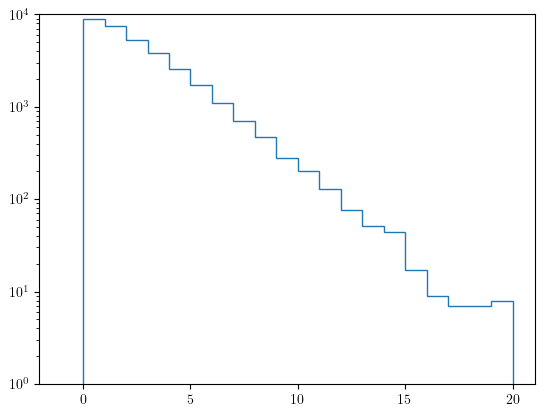

In [423]:
pl.figure()
# _ = pl.hist(Nhalos_truth.flatten(), bins=50, range=(0, 50), histtype='step')
_ = pl.hist(Nhalos_truth.flatten(), bins=21, range=(-1, 20), histtype='step')
pl.yscale('log')
pl.ylim(1, 1e4)






In [427]:
# dfhalo_ngp_xyzM_sorted_scaled[0,0,0,:,0]
np.amax(dfhalo_ngp_xyzM_sorted_scaled_digitized)



64

In [429]:
dfhalo_ngp_xyzM_tokenized[0,0,0,:]

array([ 0,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,
        1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,
        1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,
        1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,
        1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1,
       66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 66,  1,  1,  1,  1, 65],
      dtype=int32)

(32768, 101)

In [432]:
# dfhalo_ngp_xyzM_tokenized_padded_ended
ind_empty = np.where(dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed[:,1] == end_token)[0]
ind_full = np.where(dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed[:,-1] == end_token)[0]



In [433]:
# dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed[ind_empty[0],:]
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed[ind_full[0],:], dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed[ind_full[0],:].shape




(array([ 0, 33, 43, 41, 43, 66, 27, 13, 13, 43, 66, 24, 26, 49, 53, 66, 23,
        31, 42, 51, 66, 20,  6, 22, 49, 66, 18, 17, 35, 49, 66, 15, 41,  4,
        27, 66, 15, 55, 46, 16, 66, 14, 29,  5,  4, 66, 13, 56, 20, 53, 66,
        11, 45, 41, 49, 66, 11,  8, 24, 48, 66,  7, 27, 48, 53, 66,  6, 46,
         6,  7, 66,  5, 18, 40, 50, 66,  5, 41, 41, 58, 66,  5, 43, 21, 47,
        66,  5, 27, 26, 17, 66,  5, 39,  6, 15, 66,  2,  2, 20, 31, 65],
       dtype=int32),
 (101,))

In [434]:
# np.min(np.sum(delta_box_all_squeezed[ind_empty[0],:,:,:,0], axis=0)), np.max(np.sum(delta_box_all_squeezed[ind_empty[0],:,:,:,0], axis=0))
np.min(np.sum(delta_box_all_squeezed[ind_full[0],:,:,:,0], axis=0)), np.max(np.sum(delta_box_all_squeezed[ind_full[0],:,:,:,0], axis=0))


(0.0, 1.5739259757101536)

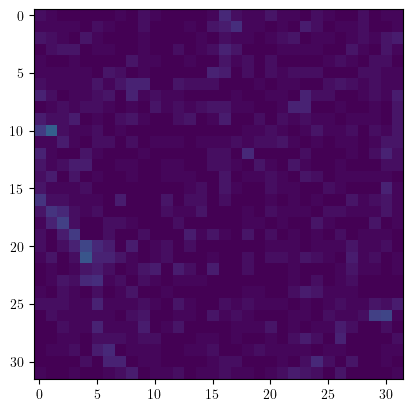

In [435]:
# delta_box_all_squeezed.shape
pl.figure()
pl.imshow(np.sum(delta_box_all_squeezed[ind_empty[0],:,:,:,0], axis=0), vmin=0, vmax=1.0)



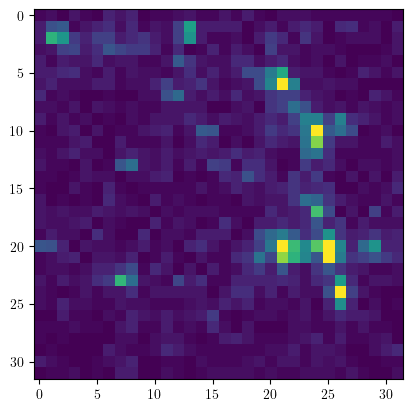

In [436]:
pl.figure()
pl.imshow(np.sum(delta_box_all_squeezed[ind_full[0],:,:,:,0], axis=0), vmin=0, vmax=1.0)



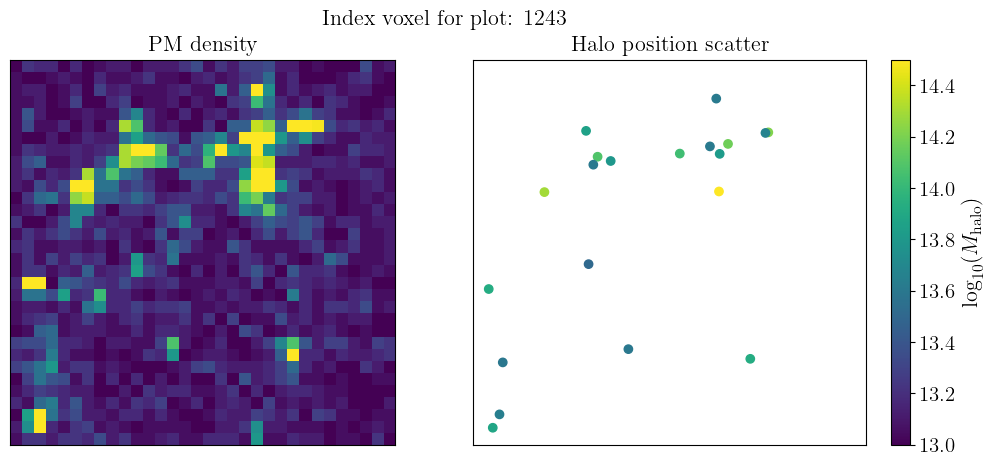

In [438]:
fig, (ax2, ax3) = pl.subplots(1, 2, figsize=(13, 5))

indp = ind_full[0]
ax2.imshow(np.sum(delta_box_all_squeezed[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
ax2.set_title('PM density', size=16)
# pl.colorbar()
ax2.set_xticks([])
ax2.set_yticks([])

scatter = ax3.scatter(dfhalo_ngp_wxyzM_flatten[indp,:,1][:int(Nhalos_truth_flatten[indp])], dfhalo_ngp_wxyzM_flatten[indp,:,2][:int(Nhalos_truth_flatten[indp])], c=dfhalo_ngp_wxyzM_flatten[indp,:,3][:int(Nhalos_truth_flatten[indp])], cmap='viridis', vmin=13, vmax=14.5)
ax3.set_xlim(-xmin, xmin)
ax3.set_ylim(-xmin, xmin)
ax3.set_title('Halo position scatter', size=16)
ax3.set_xticks([])
ax3.set_yticks([])

cbar = pl.colorbar(scatter, ax=ax3)
cbar.set_label(r'$\log_{10}(M_{\rm halo})$', size=16)
cbar.ax.tick_params(labelsize=15)

pl.suptitle(f'Index voxel for plot: {indp}', size=16)
pl.subplots_adjust(wspace=0.05)



In [439]:
# facecolors.shape
# norm(density_data)

In [440]:
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import Normalize
# # Assume that ind_full, delta_box_all_squeezed, dfhalo_ngp_wxyzM_flatten, Nhalos_truth_flatten, and xmin are already defined

# fig = plt.figure(figsize=(11, 6))

# # 3D image plot
# ax2 = fig.add_subplot(121, projection='3d')
# indp = ind_full[0]
# x, y, z = np.indices(delta_box_all_squeezed[indp, :, :, :, 0].shape)

# density_data = delta_box_all_squeezed[indp, :, :, :, 0]
# voxels = density_data > 0.

# norm = Normalize(vmin=0.05, vmax=0.3)
# facecolors = plt.cm.viridis(norm(density_data))

# # alpha_values = norm(density_data)  # Using normalized density as alpha values

# # Set alpha values based on normalized density
# facecolors[..., -1] = (density_data/np.amax(density_data)) + (density_data/np.amax(density_data))**2

# ax2.voxels(voxels, facecolors=facecolors)

# # Create a ScalarMappable for the colorbar
# sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
# sm.set_array([])  # You can pass an empty array since we are setting the norm

# # Add the colorbar to the voxel plot
# cbar_voxel = plt.colorbar(sm, ax=ax2, shrink=0.5, aspect=15)
# cbar_voxel.set_label('Dark Matter Density', size=16)
# cbar_voxel.ax.tick_params(labelsize=14)


# # voxels = delta_box_all_squeezed[indp, :, :, :, 0] > 0.1
# # colors = np.zeros(voxels.shape + (4,))
# # colors[..., 0] = 1  # Red color
# # colors[..., -1] = 0.5  # Transparency

# # ax2.voxels(voxels, facecolors=colors, edgecolor='k')
# ax2.set_title('Sub-box PM density', size=16)
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_zticks([])

# # 3D scatter plot
# ax3 = fig.add_subplot(122, projection='3d')
# # new_variable = np.random.uniform(13, 15.5, size=int(Nhalos_truth_flatten[indp]))
# scatter = ax3.scatter(dfhalo_ngp_wxyzM_flatten[indp, :, 0][:int(Nhalos_truth_flatten[indp])],
#                       dfhalo_ngp_wxyzM_flatten[indp, :, 1][:int(Nhalos_truth_flatten[indp])],
#                       dfhalo_ngp_wxyzM_flatten[indp, :, 2][:int(Nhalos_truth_flatten[indp])],
#                       c=dfhalo_ngp_wxyzM_flatten[indp,:,3][:int(Nhalos_truth_flatten[indp])], cmap='viridis', vmin=13, vmax=14.5, s=12)
# ax3.set_xlim(-xmin, xmin)
# ax3.set_ylim(-xmin, xmin)
# ax3.set_zlim(-xmin, xmin)
# ax3.set_title('Sub-box Halo position', size=16)
# ax3.set_xticks([])
# ax3.set_yticks([])
# ax3.set_zticks([])
# # ax3.set_xlabel(r'(Box Size)/32')

# # Add a color bar to show the color scale
# cbar = plt.colorbar(scatter, ax=ax3, shrink=0.5, aspect=15)
# # cbar.set_label('New Variable (13 to 15.5)')
# cbar.set_label(r'$\log_{10}({\rm Halo \, Mass})$', size=16)
# cbar.ax.tick_params(labelsize=15)

# # plt.suptitle(f'Index voxel for plot: {indp}', size=16)

# # Adjust the spacing between the left and right plots
# plt.subplots_adjust(wspace=0.4)  # Adjust the wspace parameter as needed

# plt.tight_layout()
# # plt.show()
# plt.savefig(f'3D_PM_density_halo_position_isim_{isim_fid}.png', dpi=300, bbox_inches='tight')



In [441]:
# np.amin(alpha_values), np.amax(alpha_values)
np.amin(density_data), np.amax(density_data)



(0.0, 0.9860740900039673)

In [442]:
# indp = ind_full[0]

# fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(18, 5))

# ax1.imshow(np.sum(delta_box_all_squeezed_IC[indp,:,:,:,2], axis=0).T, origin='lower', vmin=0.0, vmax=0.1)
# ax1.set_title('Quijote density', size=16)
# # ax1.imshow(np.sum(delta_box_all_squeezed_1[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
# # ax1.set_title('Quijote density', size=16)
# # ax1.colorbar()
# # indp = ind_empty[0]
# ax2.imshow(np.sum(delta_box_all_squeezed[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
# ax2.set_title('PM density', size=16)
# # pl.colorbar()

# ax3.scatter(dfhalo_ngp_wxyzM_flatten[indp,:,1][:int(Nhalos_truth_flatten[indp])], dfhalo_ngp_wxyzM_flatten[indp,:,2][:int(Nhalos_truth_flatten[indp])])
# ax3.set_xlim(-xmin, xmin)
# ax3.set_ylim(-xmin, xmin)
# ax3.set_title('Halo position scatter', size=16)

# pl.suptitle(f'Index voxel for plot: {indp}', size=16)




In [443]:
# start_token = 0
# pad_token = 1
# end_token = nvocab + 1
# space_token = nvocab + 2
# max_sentence_length = 1 + nMax_h*4 + 1 + (nMax_h-1)


In [444]:
# max_sentence_length
# np.amax(dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed), np.amin(dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed)
# nvocab + 3

# nvocab + 3

# Do some sanity checks:


In [119]:
df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/df_halo_part_ngp_xyzM_tokenized_density3Dgrid_32_isim_1_snap_3.pkl','rb'))

dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_1 = df['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed']
dfhalo_ngp_wxyzM_1 = df['dfhalo_ngp_wxyzM']
Nhalos_truth_1 = df['Nhalos_truth']
delta_box_all_squeezed_1= df['delta_box_all_squeezed']



In [127]:
Nhalos_truth_flatten = np.reshape(Nhalos_truth, (grid*grid*grid,))


In [128]:
# Nhalos_truth_flatten[0]


5.0

In [111]:
# dfhalo_ngp_wxyzM[0,0,0,:,0]
dfhalo_ngp_wxyzM_flatten = np.reshape(dfhalo_ngp_wxyzM, (grid*grid*grid, nMax_h, 4))



In [153]:
# delta_box_all_squeezed.shape, dfhalo_ngp_wxyzM_flatten.shape

indp = 90


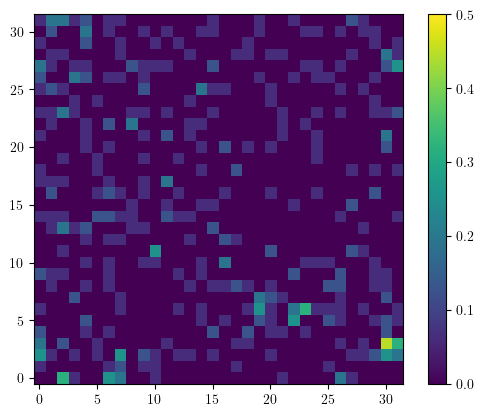

In [154]:
pl.figure()
pl.imshow(np.sum(delta_box_all_squeezed_1[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
pl.colorbar()


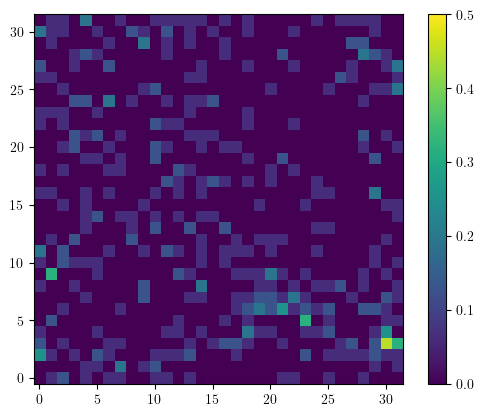

In [155]:
pl.figure()
pl.imshow(np.sum(delta_box_all_squeezed[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
pl.colorbar()




(-15.625, 15.625)

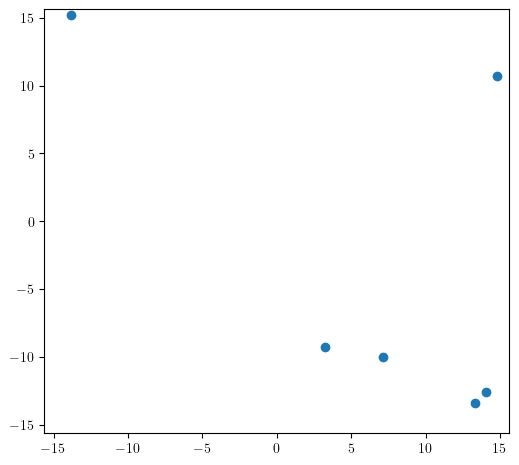

In [156]:
pl.figure(figsize=(6,5.5))
pl.scatter(dfhalo_ngp_wxyzM_flatten[indp,:,1][:int(Nhalos_truth_flatten[indp])], dfhalo_ngp_wxyzM_flatten[indp,:,2][:int(Nhalos_truth_flatten[indp])])
pl.xlim(-xmin, xmin)
pl.ylim(-xmin, xmin)


Text(0.5, 0.98, 'Index voxel for plot: 90')

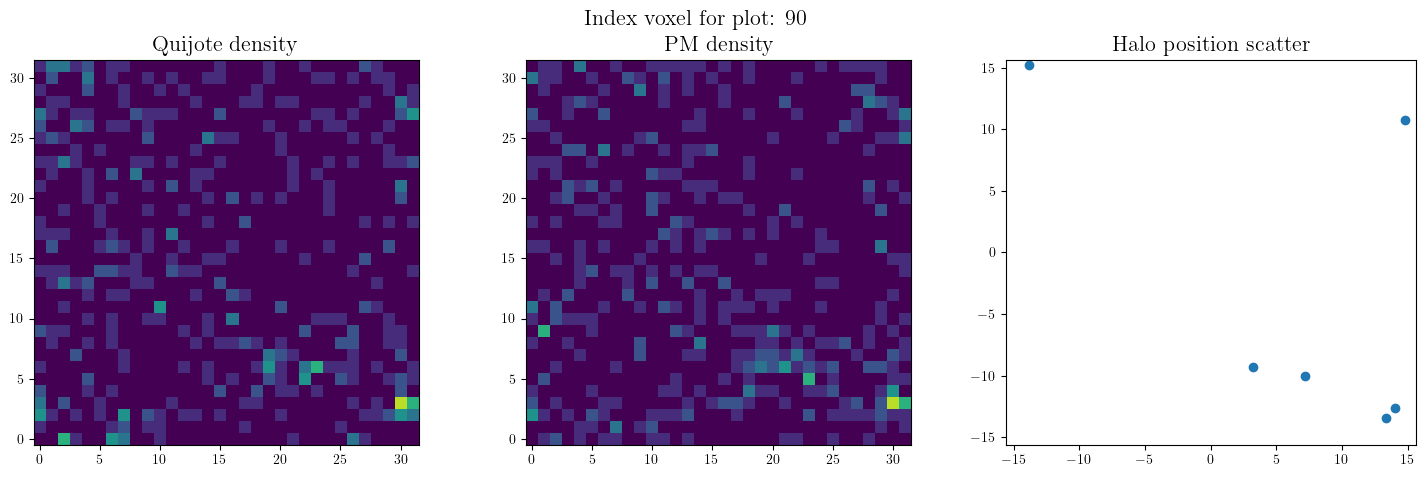

In [157]:
fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(18, 5))

ax1.imshow(np.sum(delta_box_all_squeezed_1[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
ax1.set_title('Quijote density', size=16)
# ax1.colorbar()

ax2.imshow(np.sum(delta_box_all_squeezed[indp,:,:,:,0], axis=0).T, origin='lower', vmin=0.0, vmax=0.5)
ax2.set_title('PM density', size=16)
# pl.colorbar()

ax3.scatter(dfhalo_ngp_wxyzM_flatten[indp,:,1][:int(Nhalos_truth_flatten[indp])], dfhalo_ngp_wxyzM_flatten[indp,:,2][:int(Nhalos_truth_flatten[indp])])
ax3.set_xlim(-xmin, xmin)
ax3.set_ylim(-xmin, xmin)
ax3.set_title('Halo position scatter', size=16)

pl.suptitle(f'Index voxel for plot: {indp}', size=16)



In [136]:
xmin


15.625

In [ ]:
# pl.figure()
# pl.imshow(np.sum(delta_sbox0[:,:,:], axis=0))
# pl.colorbar()



# save to disk in binary format to easy reading with memmap:


In [12]:
# _nvocab64_Mmin_1e13p5
# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_0_snap_3_FINAL.pkl','rb'))
# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_0_snap_3_nvocab64_Mmin_1e13p5.pkl','rb'))
df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_0_snap_3_nvocab64.pkl','rb'))

dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0 = df['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed']
dfhalo_ngp_wxyzM_0 = df['dfhalo_ngp_wxyzM']
Nhalos_truth_0 = df['Nhalos_truth']
delta_box_all_squeezed_0 = df['delta_box_all_squeezed']


# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_1_snap_3_FINAL.pkl','rb'))
# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_1_snap_3_nvocab64_Mmin_1e13p5.pkl','rb'))
df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_1_snap_3_nvocab64.pkl','rb'))

dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_1 = df['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed']
dfhalo_ngp_wxyzM_1 = df['dfhalo_ngp_wxyzM']
Nhalos_truth_1 = df['Nhalos_truth']
delta_box_all_squeezed_1= df['delta_box_all_squeezed']


# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_2_snap_3_FINAL.pkl','rb'))
# df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_2_snap_3_nvocab64_Mmin_1e13p5.pkl','rb'))
df = pk.load(open('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_2_snap_3_nvocab64.pkl','rb'))
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_2 = df['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed']
dfhalo_ngp_wxyzM_2 = df['dfhalo_ngp_wxyzM']
Nhalos_truth_2 = df['Nhalos_truth']
delta_box_all_squeezed_2 = df['delta_box_all_squeezed']




In [13]:
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all = np.vstack((dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0, dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_1, dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_2)).astype(np.int16)





In [14]:
delta_box_all_squeezed_all = np.vstack((delta_box_all_squeezed_0, delta_box_all_squeezed_1, delta_box_all_squeezed_2)).astype(np.float32)
delta_box_all_squeezed_all = np.moveaxis(delta_box_all_squeezed_all, -1, 1)


In [15]:
nMax_h = df['nMax_h']
grid = df['grid']


In [16]:
grid = dfhalo_ngp_wxyzM_0.shape[0]
dfhalo_ngp_wxyzM_0_reshape = np.reshape(dfhalo_ngp_wxyzM_0, (grid*grid*grid, nMax_h, 4))
dfhalo_ngp_wxyzM_1_reshape = np.reshape(dfhalo_ngp_wxyzM_1, (grid*grid*grid, nMax_h, 4))
dfhalo_ngp_wxyzM_2_reshape = np.reshape(dfhalo_ngp_wxyzM_2, (grid*grid*grid, nMax_h, 4))
dfhalo_ngp_wxyzM_reshape_all = np.vstack((dfhalo_ngp_wxyzM_0_reshape, dfhalo_ngp_wxyzM_1_reshape, dfhalo_ngp_wxyzM_2_reshape)).astype(np.float32)



In [17]:
Nhalos_truth_0_reshape = np.reshape(Nhalos_truth_0, (grid*grid*grid))
Nhalos_truth_1_reshape = np.reshape(Nhalos_truth_1, (grid*grid*grid))
Nhalos_truth_2_reshape = np.reshape(Nhalos_truth_2, (grid*grid*grid))
Nhalos_truth_reshape_all = np.concatenate((Nhalos_truth_0_reshape, Nhalos_truth_1_reshape, Nhalos_truth_2_reshape)).astype(np.int16)



In [18]:
        # 'nvocab_total': nvocab + 3,
        # 'max_sentence_length': max_sentence_length,
        # 'grid': grid,
        # 'nMax_h': nMax_h,
        # 'BoxSize': BoxSize,
        # 'lgMin': lgMin,
        # 'lgMax': lgMax,
        # 'xmin': xmin,
        # 'norm_delta': norm_delta,
        # 'start_token': start_token,
        # 'pad_token': pad_token,
        # 'end_token': end_token,
        # 'space_token': space_token


In [19]:
# save using h5py
import h5py as h5
# f = h5.File('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_012_snap_3_FINAL.h5', 'w')
# f = h5.File('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_012_snap_3_nvocab64_Mmin_13p5.h5', 'w')
f = h5.File('/mnt/home/spandey/ceph/CHARFORMER/data/PM/df_halo_part_ngp_xyzM_tokenized_PM_384x384x384_density3Dgrid_32_isim_012_snap_3_nvocab64_Mmin_13p0.h5', 'w')
f.create_dataset('dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all', data=dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all)
f.create_dataset('delta_box_all_squeezed_all', data=delta_box_all_squeezed_all)
f.create_dataset('dfhalo_ngp_wxyzM_reshape_all', data=dfhalo_ngp_wxyzM_reshape_all)
f.create_dataset('Nhalos_truth_reshape_all', data=Nhalos_truth_reshape_all)
f.create_dataset('nvocab_total', data=df['nvocab_total'])
f.create_dataset('max_sentence_length', data=df['max_sentence_length'])
f.create_dataset('grid', data=df['grid'])
f.create_dataset('nMax_h', data=df['nMax_h'])
f.create_dataset('BoxSize', data=df['BoxSize'])
f.create_dataset('lgMin', data=df['lgMin'])
f.create_dataset('lgMax', data=df['lgMax'])
f.create_dataset('xmin', data=df['xmin'])
f.create_dataset('norm_delta', data=df['norm_delta'])
f.create_dataset('start_token', data=df['start_token'])
f.create_dataset('pad_token', data=df['pad_token'])
f.create_dataset('end_token', data=df['end_token'])
f.create_dataset('space_token', data=df['space_token'])
f.close()




In [11]:
df['max_sentence_length'], df['nvocab_total'], df['grid'], df['nMax_h'], df['BoxSize'], df['lgMin'], df['lgMax'], df['xmin'], df['norm_delta'], df['start_token'], df['pad_token'], df['end_token'], df['space_token']



(101, 67, 32, 20, 1000.0, 13.5, 15.5, 15.625, 1000, 0, 1, 65, 66)

In [20]:
df['max_sentence_length'], df['nvocab_total'], df['grid'], df['nMax_h'], df['BoxSize'], df['lgMin'], df['lgMax'], df['xmin'], df['norm_delta'], df['start_token'], df['pad_token'], df['end_token'], df['space_token']




(211, 67, 32, 42, 1000.0, 13.0, 15.5, 15.625, 1000, 0, 1, 65, 66)

In [14]:
# dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all.shape
# dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_0.shape
# dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all.dtype
sdir = '/mnt/home/spandey/ceph/CHARFORMER/data/'
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all.tofile(sdir + 'dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_isim_0_to_2.bin')



In [16]:
# delta_box_all_squeezed_2.shape
delta_box_all_squeezed_all = np.vstack((delta_box_all_squeezed_0, delta_box_all_squeezed_1, delta_box_all_squeezed_2))
delta_box_all_squeezed_all = np.moveaxis(delta_box_all_squeezed, -1, 1)
delta_box_all_squeezed_all.shape


: 

In [ ]:
delta_box_all_squeezed_all.tofile(sdir + 'dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_isim_0_to_2.bin')



In [ ]:
dfhalo_ngp_wxyzM_all = np.vstack((dfhalo_ngp_wxyzM_0, dfhalo_ngp_wxyzM_1, dfhalo_ngp_wxyzM_2))
print(dfhalo_ngp_wxyzM_all.shape)



In [ ]:
dfhalo_ngp_wxyzM_reshape_all = np.vstack((dfhalo_ngp_wxyzM_0_reshape, dfhalo_ngp_wxyzM_1_reshape, dfhalo_ngp_wxyzM_2_reshape))

In [ ]:
Nhalos_truth_reshape_all = np.concatenate((Nhalos_truth_0_reshape, Nhalos_truth_1_reshape, Nhalos_truth_2_reshape))



In [ ]:
dfhalo_ngp_wxyzM_reshape_all.tofile(sdir + 'dfhalo_ngp_wxyzM_reshape_all_squeezed_isim_0_to_2.bin')




In [ ]:
# Nhalos_truth_0_reshape = np.reshape(Nhalos_truth_0.shape, (grid*grid*grid))
Nhalos_truth_reshape_all.tofile(sdir + 'Nhalos_truth_reshape_all_squeezed_isim_0_to_2.bin')


In [1]:
import numpy as np
import h5py as h5

f = h5.File('/mnt/home/spandey/ceph/CHARFORMER/data/df_halo_part_ngp_xyzM_tokenized_density3Dgrid_32_isim_012_snap_3.h5', 'r')
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all = f['dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all'][:]
delta_box_all_squeezed_all = f['delta_box_all_squeezed_all'][:]
f.close()






In [3]:
dfhalo_ngp_xyzM_tokenized_padded_ended_squeezed_all.shape



(98304, 161)

In [4]:
delta_box_all_squeezed_all.shape



(98304, 3, 32, 32, 32)